In [1]:
# %load /Users/xichen/Library/Mobile\ Documents/com~apple~CloudDocs/computer_bootstrap/my_imports.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from scipy.io import mmread
from collections import Counter
import matplotlib.pyplot as plt

Kelly = ['#af2337', '#ecc342', '#2967a0', '#2f3c28', '#96b437',
         '#da93ab', '#e58932', '#80598f', '#7e331f', '#3b855a',
         '#c0b286', '#a9c9ed', '#ec977f', '#848482', '#604628',
         '#d26034', '#a64c6b', '#dbd245', '#eba83b', '#5d5092',
         '#222222', '#f2f3f4']

GreenArmytage = ['#e3a7fa', '#3575d5', '#8d4418', '#440b59', '#191919', '#285a35',
                 '#6aca5b', '#f6cda0', '#808080', '#b1fcbb', '#8c7c26', '#a8ca3f',
                 '#af2785', '#13347b', '#51a12f', '#f1acbb', '#4b651a', '#e73329',
                 '#8deef0', '#48978f', '#e7fd7d', '#0c1ff5', '#8a1a11', '#fffe92',
                 '#f9e14c', '#e95d2a']

Chromsomes = ['#fefb57', '#c15662', '#b3bff5', '#75f9f0', '#ea8a33',
              '#9e5dca', '#946e6b', '#f3c985', '#f0feee', '#afe347',
              '#5dc5e5', '#e73ff0', '#e23022', '#ed7fc5', '#4f8283',
              '#af35f5', '#49a9f6', '#ea3584', '#94f8b8', '#4d6df6',
              '#eafdad', '#f6c6ec', '#5d8841', '#74f973']

mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=Kelly)
mpl.rcParams['axes.titlesize'] = 19
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['legend.markerscale'] = 1
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['figure.dpi'] = 100

# ATAC

In [2]:
hs_atac = pd.read_csv('ATAC/full_analysis/outs/per_cell_barcode_total_fragment_count_GRCh38.tsv',
                      header=None, names=['count_hs', 'cb'], sep='\t')
mm_atac = pd.read_csv('ATAC/full_analysis/outs/per_cell_barcode_total_fragment_count_mm10.tsv',
                      header=None, names=['count_mm', 'cb'], sep='\t')
df_atac = pd.merge(hs_atac, mm_atac, on = 'cb')
df_atac['total'] = df_atac['count_hs'] + df_atac['count_mm']
df_atac.head()

,count_hs,cb,count_mm,total
0,28529,AAACAAACAGCTAGAA,231,28760
1,2559,AAACAAACCGGAGAGA,110,2669
2,5563,AAACCGAGAGCTAGAA,77,5640
3,5718,AAACCGAGCGGAGAGA,68,5786
4,485,AAACCTCAAGCTAGAA,97560,98045


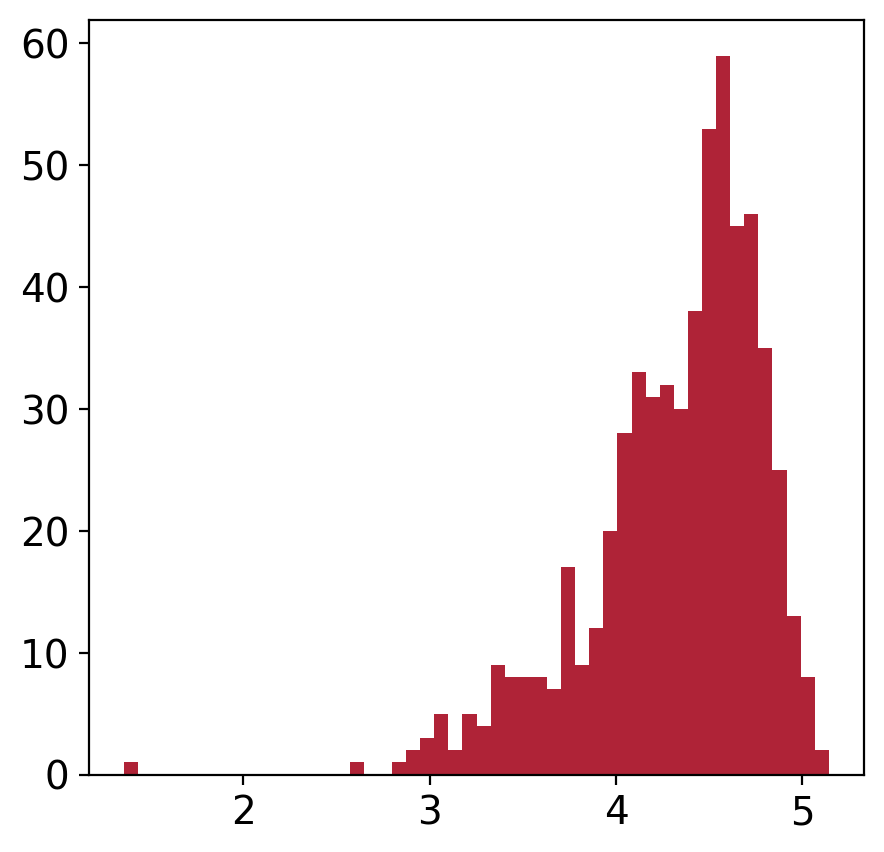

In [3]:
plt.figure(figsize=(5,5))
plt.hist(np.log10(df_atac['total']), 50)
plt.show()

In [4]:
df_atac['species'] = 0
df_atac.loc[df_atac['total'] < 1000, 'species'] = 'Low yield'
df_atac.loc[df_atac['count_hs']/df_atac['total'] >=0.9, 'species'] = 'Human'
df_atac.loc[df_atac['count_mm']/df_atac['total'] >=0.9, 'species'] = 'Mouse'
df_atac.replace({'species' : {0 : 'Mix'}}, inplace=True)

In [5]:
df_atac.species.value_counts()

Human        429
Mouse        162
Mix            8
Low yield      1
Name: species, dtype: int64

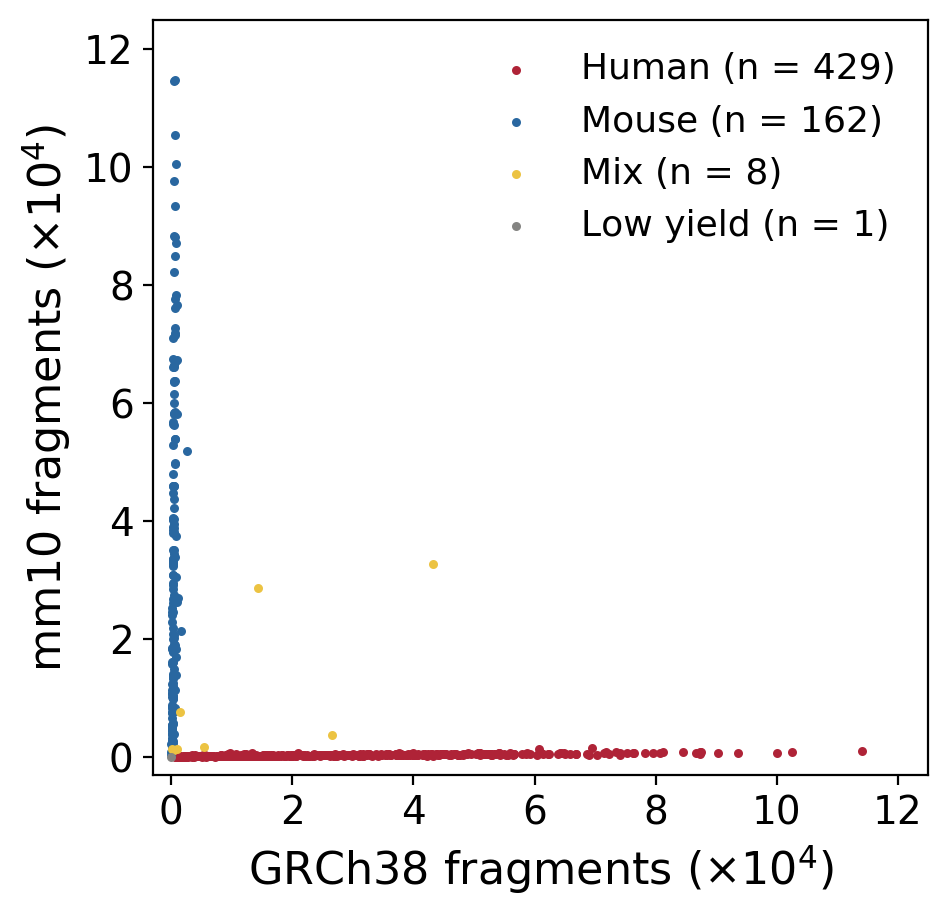

In [6]:
plt.figure(figsize=(5,5))
for sp, c in zip(['Human', 'Mouse', 'Mix', 'Low yield'], ['#af2337', '#2967a0', '#ecc342', '#848482']):
    plt.scatter(df_atac.query('species == @sp')['count_hs'], df_atac.query('species == @sp')['count_mm'],
                c=c, s=5, label='%s (n = %s)' % (sp, df_atac.species.value_counts()[sp]))
plt.legend(frameon=False, markerscale=1)
plt.xlim(-3000,125000)
plt.ylim(-3000,125000)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['0', '2', '4', '6', '8', '10', '12'])
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['0', '2', '4', '6', '8', '10', '12'])
plt.xlabel(r'GRCh38 fragments ($\times 10^4$)')
plt.ylabel(r'mm10 fragments ($\times 10^4$)')
plt.savefig('barnyard_facs_atac_full.pdf', bbox_inches='tight', transparent=True)
plt.show()

# RNA

In [7]:
hs_rna = pd.read_csv('RNA/full_analysis/outs/per_cell_barcode_total_read_count_GRCh38.tsv',
                     header=None, names=['count_hs', 'cb'], sep='\t')
mm_rna = pd.read_csv('RNA/full_analysis/outs/per_cell_barcode_total_read_count_mm10.tsv',
                     header=None, names=['count_mm', 'cb'], sep='\t')
df_rna = pd.merge(hs_rna, mm_rna, how = 'inner', on = 'cb')
df_rna['total'] = df_rna['count_hs'] + df_rna['count_mm']
df_rna.head()

,count_hs,cb,count_mm,total
0,27011,AAACAAACCTCCTTAC,7515,34526
1,205729,AAACAAACCTTAATAG,14563,220292
2,46575,AAACCGAGCTCCTTAC,5691,52266
3,89829,AAACCGAGCTTAATAG,10331,100160
4,73376,AAACCTCACTCCTTAC,9183,82559


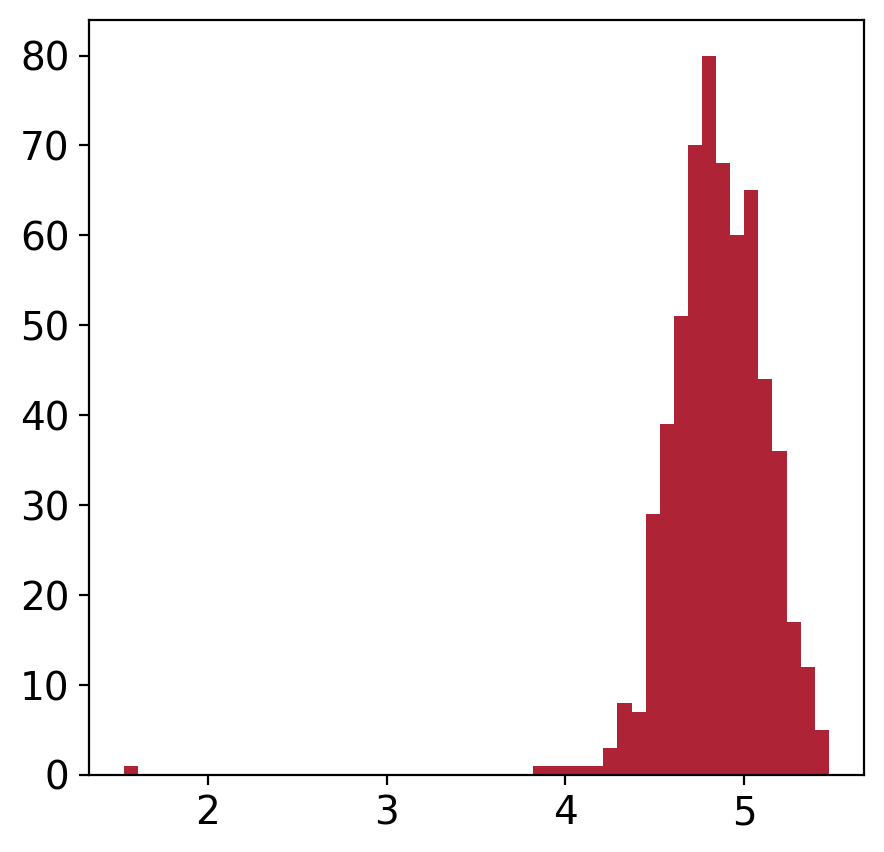

In [8]:
plt.figure(figsize=(5,5))
plt.hist(np.log10(df_rna['total']), 50)
plt.show()

In [9]:
df_rna['species'] = 0
df_rna.loc[df_rna['total'] < 1000, 'species'] = 'Low yield'
df_rna.loc[df_rna['count_hs']/df_rna['total'] >=0.8, 'species'] = 'Human'
df_rna.loc[df_rna['count_mm']/df_rna['total'] >=0.8, 'species'] = 'Mouse'
df_rna.replace({'species' : {0 : 'Mix'}}, inplace=True)

In [10]:
df_rna.species.value_counts()

Human        416
Mouse        162
Mix           21
Low yield      1
Name: species, dtype: int64

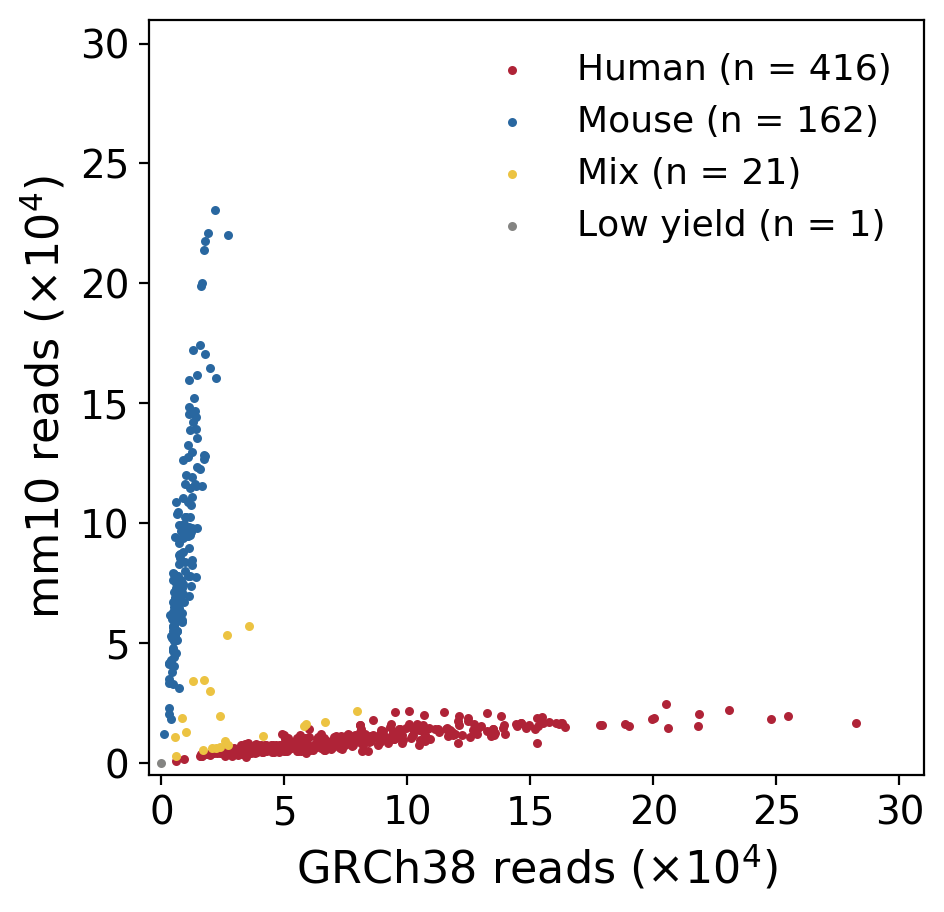

In [11]:
plt.figure(figsize=(5,5))
for sp, c in zip(['Human', 'Mouse', 'Mix', 'Low yield'], ['#af2337', '#2967a0', '#ecc342', '#848482']):
    plt.scatter(df_rna.query('species == @sp')['count_hs'], df_rna.query('species == @sp')['count_mm'],
                c=c, s=5, label='%s (n = %s)' % (sp, df_rna.species.value_counts()[sp]))
plt.legend(frameon=False, markerscale=1)
plt.xticks([0, 50000, 100000, 150000, 200000, 250000, 300000], ['0', '5', '10', '15', '20', '25', '30'])
plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000], ['0', '5', '10', '15', '20', '25', '30'])
plt.xlim(-5000,310000)
plt.ylim(-5000,310000)
plt.xlabel(r'GRCh38 reads ($\times 10^4$)')
plt.ylabel(r'mm10 reads ($\times 10^4$)')
plt.savefig('barnyard_facs_rna_full.pdf', bbox_inches='tight', transparent=True)
plt.show()

# Joint

In [12]:
df_rna.head(2)

,count_hs,cb,count_mm,total,species
0,27011,AAACAAACCTCCTTAC,7515,34526,Mix
1,205729,AAACAAACCTTAATAG,14563,220292,Human


In [13]:
df_atac.head(2)

,count_hs,cb,count_mm,total,species
0,28529,AAACAAACAGCTAGAA,231,28760,Human
1,2559,AAACAAACCGGAGAGA,110,2669,Human


In [14]:
df_atac['well_id'] = df_atac.cb.str.extract('([ACGT]{8})[ACGT]{8}', expand = False)
df_atac['mode_id'] = df_atac.cb.str.extract('[ACGT]{8}([ACGT]{8})', expand = False)
df_atac.replace({'CGGAGAGA' : 'CTCCTTAC', 'AGCTAGAA' : 'CTTAATAG'}, inplace = True)
df_atac['cb'] = df_atac['well_id'] + df_atac['mode_id']

In [15]:
df_joint = pd.merge(df_atac.drop(labels= ['well_id', 'mode_id'], axis = 1), df_rna, how = 'inner', on = 'cb', suffixes = ('_atac', '_rna'))
df_joint.head()

,count_hs_atac,cb,count_mm_atac,total_atac,species_atac,count_hs_rna,count_mm_rna,total_rna,species_rna
0,28529,AAACAAACCTTAATAG,231,28760,Human,205729,14563,220292,Human
1,2559,AAACAAACCTCCTTAC,110,2669,Human,27011,7515,34526,Mix
2,5563,AAACCGAGCTTAATAG,77,5640,Human,89829,10331,100160,Human
3,5718,AAACCGAGCTCCTTAC,68,5786,Human,46575,5691,52266,Human
4,485,AAACCTCACTTAATAG,97560,98045,Mouse,10775,108800,119575,Mouse


In [16]:
df_joint['ATAC GRCh38 fragments %'] = df_joint['count_hs_atac']/df_joint['total_atac'] * 100
df_joint['RNA GRCh38 reads %'] = df_joint['count_hs_rna']/df_joint['total_rna'] * 100

In [19]:
df_joint['species_joint'] = df_joint['species_atac'] + df_joint['species_rna']
df_joint.head()

,count_hs_atac,cb,count_mm_atac,total_atac,species_atac,count_hs_rna,count_mm_rna,total_rna,species_rna,ATAC GRCh38 fragments %,RNA GRCh38 reads %,species_joint
0,28529,AAACAAACCTTAATAG,231,28760,Human,205729,14563,220292,Human,99.196801,93.389229,HumanHuman
1,2559,AAACAAACCTCCTTAC,110,2669,Human,27011,7515,34526,Mix,95.878606,78.233795,HumanMix
2,5563,AAACCGAGCTTAATAG,77,5640,Human,89829,10331,100160,Human,98.634752,89.685503,HumanHuman
3,5718,AAACCGAGCTCCTTAC,68,5786,Human,46575,5691,52266,Human,98.824749,89.111468,HumanHuman
4,485,AAACCTCACTTAATAG,97560,98045,Mouse,10775,108800,119575,Mouse,0.494671,9.011081,MouseMouse


In [21]:
df_joint.replace({'species_joint' : {
                                        'HumanHuman'     : 'Human',
                                        'HumanMouse'     : 'Mix',
                                        'HumanMix'       : 'Mix',
                                        'HumanLow yield' : 'Low yield',
                                        'MouseHuman'     : 'Mix',
                                        'MouseMouse'     : 'Mouse',
                                        'MouseMix'       : 'Mix',
                                        'MouseLow yield' : 'Low yield',
                                        'MixHuman'     : 'Mix',
                                        'MixMouse'     : 'Mix',
                                        'MixMix'       : 'Mix',
                                        'MixLow yield' : 'Mix',
                                        'Low yieldHuman'     : 'Low yield',
                                        'Low yieldMouse'     : 'Low yield',
                                        'Low yieldMix'       : 'Low yield',
                                        'Low yieldLow yield' : 'Low yield',
                                    }
                 },
                 inplace = True)
df_joint['species_joint'].value_counts()

Human        416
Mouse        158
Mix           25
Low yield      1
Name: species_joint, dtype: int64

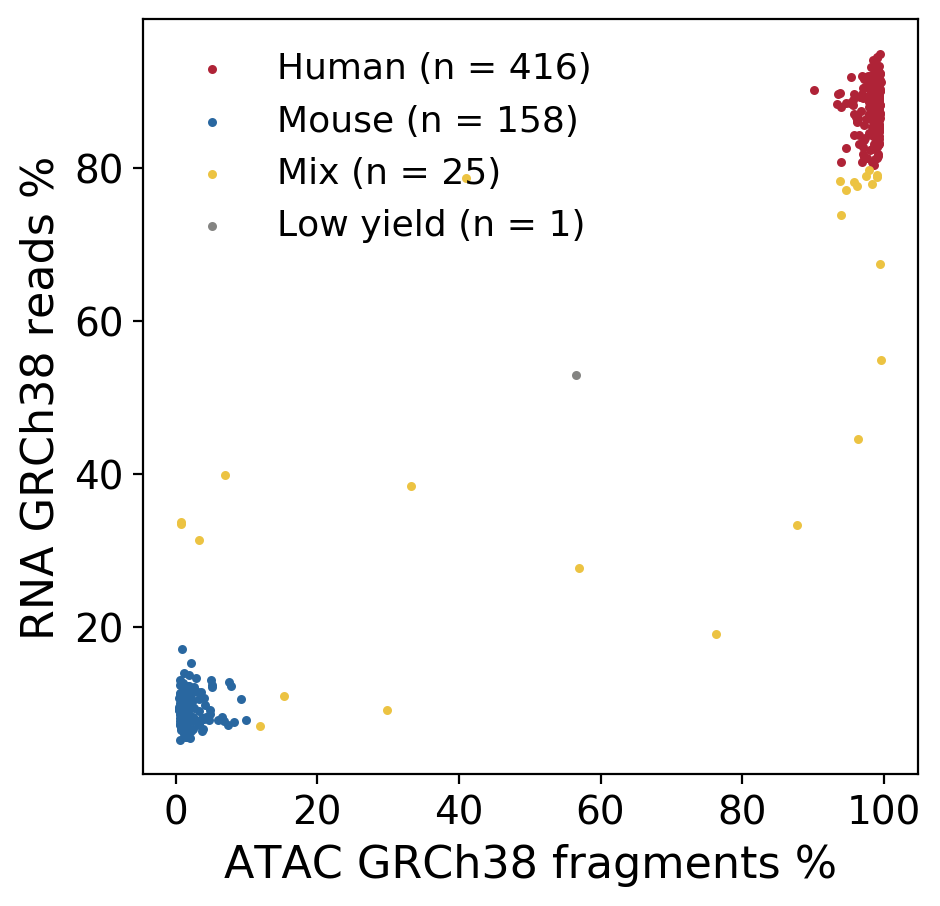

In [23]:
plt.figure(figsize=(5,5))
for sp, c in zip(['Human', 'Mouse', 'Mix', 'Low yield'], ['#af2337', '#2967a0', '#ecc342', '#848482']):
    plt.scatter(df_joint.query('species_joint == @sp')['ATAC GRCh38 fragments %'],
                df_joint.query('species_joint == @sp')['RNA GRCh38 reads %'],
                c=c, s=5, label='%s (n = %s)' % (sp, df_joint.species_joint.value_counts()[sp]))
plt.legend(frameon=False, markerscale=1)
# plt.xticks([0, 50000, 100000, 150000, 200000, 250000, 300000], ['0', '5', '10', '15', '20', '25', '30'])
# plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000], ['0', '5', '10', '15', '20', '25', '30'])
plt.xlabel(r'ATAC GRCh38 fragments %')
plt.ylabel(r'RNA GRCh38 reads %')
plt.savefig('barnyard_facs_joint_full.pdf', bbox_inches='tight', transparent=True)
plt.show()